In [124]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import cv2
from skimage.transform import radon, iradon, rescale
from phantominator import shepp_logan
import time

# Exercice 1 : Générer des images

## 1.

In [125]:
def surf(Z, colormap, X = None, Y = None, C = None, shade = None):
    if X is None and Y is None:
        X, Y = np.meshgrid(Z)
    elif X is None:
        X, _ = np.meshgrid(Z)
    elif Y is None:
        _, Y = np.meshgrid(Z)

    if C is None:
        C = Z
    
    norm = cm.colors.Normalize(vmax = abs(Z).max(), vmin = -abs(Z).max())
    scalarMap = cm.ScalarMappable(norm, cmap = colormap)

    # outputs an array where each C value is replaced with a corresponding color value
    C_colored = scalarMap.to_rgba(C)

    ax = plt.axes(projection = '3d')

    surf = ax.plot_surface(X, Y, Z, rstride = 1, cstride = 1, facecolors = C_colored, shade = shade)

    return surf

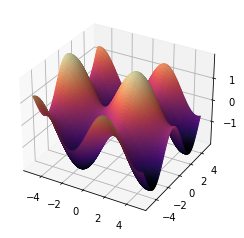

In [126]:
x = np.linspace(-5, 5, 75)
y = np.linspace(-5, 5, 75)
X, Y = np.meshgrid(x, y)

Z1 = np.sin(X) + np.cos(Y)

surf(Z1, 'magma', X, Y, None, 'shade')

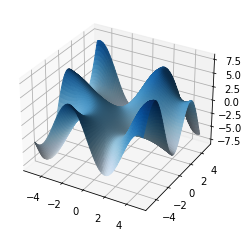

In [127]:
x = np.linspace(-5, 5, 75)
y = np.linspace(-5, 5, 75)
X, Y = np.meshgrid(x, y)

Z2 = Y*np.sin(X) - X*np.cos(Y)

surf(Z2, 'Blues', X, Y, None, 'shade')

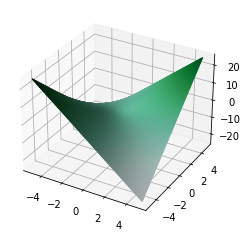

In [128]:
x = np.linspace(-5, 5, 75)
y = np.linspace(-5, 5, 75)
X, Y = np.meshgrid(x, y)

Z3 = X*Y

surf(Z3, 'BuGn', X, Y, None, 'shade')

## 2.

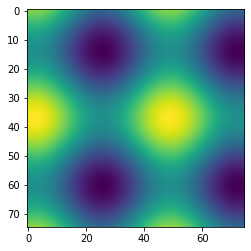

In [129]:
plt.imshow(Z1)

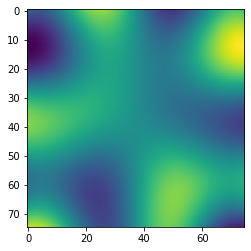

In [130]:
plt.imshow(Z2)

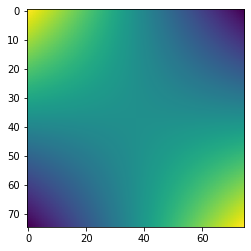

In [131]:
plt.imshow(Z3)

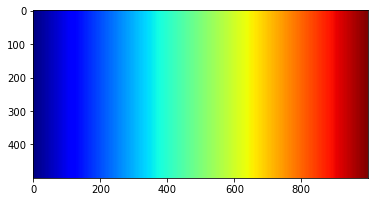

In [132]:
x = np.linspace(-5, 5, 10**3)
y = np.linspace(-5, 5, 500)
X, Y = np.meshgrid(x, y)

Z4 = X

plt.imshow(Z4, cmap = 'jet')

## 3.

In [215]:
def disc(x, y, r):
    return 1.0*(x**2 + y**2 < r)

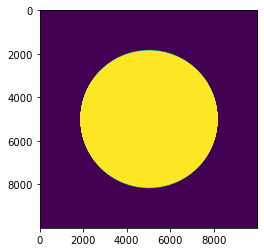

In [216]:
x = np.linspace(-5, 5, 10**4)
y = np.linspace(-5, 5, 10**4)
X, Y = np.meshgrid(x, y)
r = 10

Z_disc = disc(X, Y, r)

plt.imshow(Z_disc)

In [217]:
def cercle(x, y, r1, r2):
    return (x**2 + y**2 <= r1)*(x**2 + y**2 >= r2)*1.0

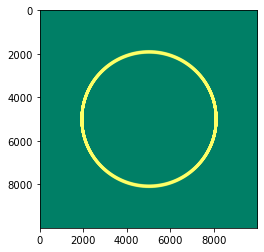

In [218]:
x = np.linspace(-5, 5, 10**4)
y = np.linspace(-5, 5, 10**4)
X, Y = np.meshgrid(x, y)
r1 = 10
r2 = 9 # Il est nécessaire que r1 > r2

Z_cercle = cercle(X, Y, r1, r2)

plt.imshow(Z_cercle, cmap = 'summer')

In [219]:
def ellipse(u, v, x, y, r1, r2):
    return (u*x**2 + v*y**2 <= r1)*(u*x**2 + v*y**2 >= r2)*1.0

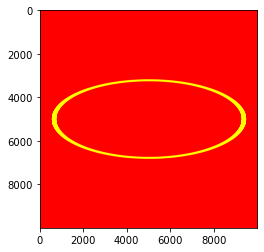

In [220]:
x = np.linspace(-5, 5, 10**4)
y = np.linspace(-5, 5, 10**4)
X, Y = np.meshgrid(x, y)
u = 0.5
v = 3
r1 = 10
r2 = 9

Z_ellipse = ellipse(u, v, X, Y,r1, r2)
plt.imshow(Z_ellipse, cmap = 'autumn')

## 4.

In [139]:
def code_barre(n,m):
    A = np.zeros((n,m))
    A[0,:] = np.random.choice(a = [0, 1], size=(m,))
    for k in range(m):
        if A[0,k] == 1:
            A[:,k] = np.ones((n,m))[:,k]
        else:
            A[:,k] = np.zeros((n,m))[:,k]
    return A

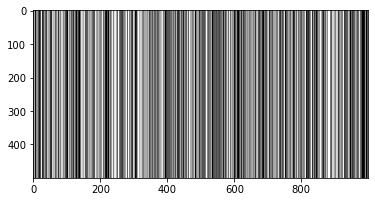

In [140]:
n = int(5e2)
m = int(1e3)

plt.imshow(code_barre(n,m), cmap = 'binary')

In [141]:
def code_barre2(n, m, a):
    A = np.zeros((n,m))
    A[0,:] = np.random.choice(a, size=(m,))
    for k in range(m):
        if A[0,k] != 0:
            A[:,k] = np.ones((n,m))[:,k]
        else:
            A[:,k] = np.zeros((n,m))[:,k]
    return A

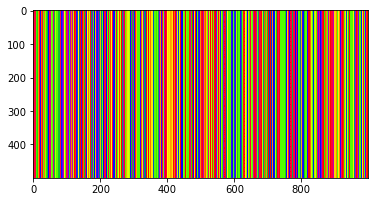

In [142]:
n = int(5e2)
m = int(1e3)
a = 3

plt.imshow(code_barre2(n,m,a), cmap = 'prism')

In [143]:
def qr_code(n,m):
    A = np.zeros((n,m))
    for k in range(m):
        for l in range(n):
            A[l,k] = np.random.choice([0,1])
    return A

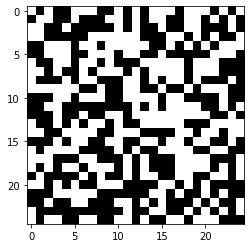

In [250]:
n = 25
m = 25

plt.imshow(qr_code(n,m), cmap = 'binary')

In [145]:
def qr_code2(n,m, a):
    A = np.zeros((n,m))
    for k in range(m):
        for l in range(n):
            A[l,k] = np.random.choice(a)
    return A

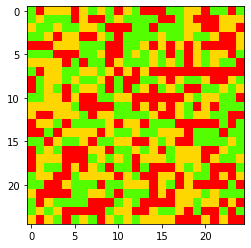

In [146]:
a = 3
plt.imshow(qr_code2(n,m,a), cmap = 'prism')

## Exercice 2 : Transformée de Radon

## 1.

On a une image $f$ de taille (2,2) et on va remplacer l’intégrale dans la formule par une somme pour tout $\theta$ allant de $[0;\pi[$ , pour tout u allant de $[-1;1]$, on a :

### $R[f](\theta, u) = \frac{1}{N}\sum_{v = \frac{-N}{2}}^{\frac{N}{2}} f(u.cos \theta - t.sin \theta + \frac{N}{2} ; u.sin \theta + t.cos \theta + \frac{N}{2})$

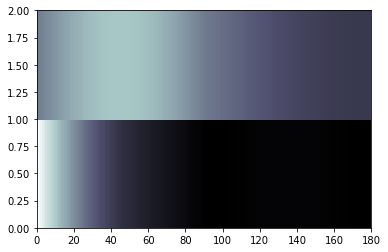

In [170]:
M = np.array([[1,0],[0,0]])
theta = np.linspace(0., 180., max(M.shape), endpoint = False)

radon(M, theta = theta, circle = True)

plt.pcolor(radon(np.array([[1,0],[0,0]]), circle = True), cmap = 'bone')
plt.show()

## 2.

La fonction Radon prend en argument une matrice et un angle de rotation. La matrice correspond à l'image c'est à dire au patient dans le cas du scanner à rayons X et le tube à rayons X est représenté par l'angle de rotation il tourne autour autour de l'image.

## 3.

In [148]:
n = 100
m = 100
a = np.zeros((n,m))

a[50,50] = 1
a[60,50] = 1
a[34,79] = 1

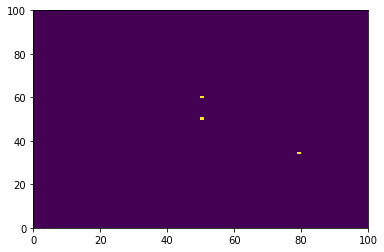

In [149]:
plt.pcolor(a, cmap = 'viridis')
plt.show()

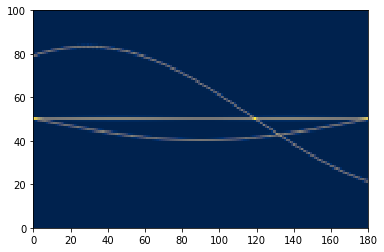

In [150]:
plt.pcolor(radon(a), cmap = 'cividis')
plt.show()

Une droite horizontale qui débute en (0,50) qui correspond au point centré elle est invariante par rapport à la transformée de Radon.

Le second point positionné sur l'axe vertical médian est perçu par une courbe qui est toujours inférieure à la droite horizontale générée par le point centré car l'indice 60 ligne est en-dessous de l'indice 50 dans la matrice a.

Le troisième point pris au hasard donne un tracé qui coupe les deux autres trajectoires car les indices matricielles $[34;79]$ sont à la fois au-dessus et en-dessous du milieu $[50;50]$.

In [151]:
n = 100
m = 100
d = np.zeros((n,m))

d[:,50] = np.ones(m)
d[25,:] = np.ones(m)

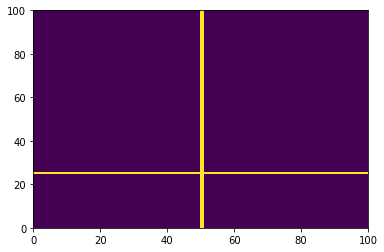

In [152]:
plt.pcolor(d, cmap = 'viridis')
plt.show()

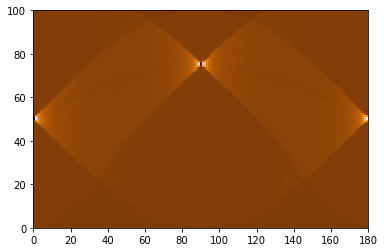

In [153]:
plt.pcolor(radon(d), cmap = 'PuOr')
plt.show()

L'intersection des droites et chaque extremités sont perçus comme des points très lumineux les 3 points sont situés sur une courbe peu visible qui représente la droite horizontale dans notre matrice. La seconde droite étant non visble car situé sous le point d'intersection à 90 en abscisse. 

## 4.

In [156]:
def rho(u):
    rho = np.zeros(len(u))
    for i in range(len(u)):
        if abs(u[i]) <= 1:
            rho[i] = 2*(1-u[i]**2)**(1/2)
        else:
            rho[i] = 0
    return rho.reshape(len(u), 1)

(1000, 1) (1000, 1) (1000, 1000)


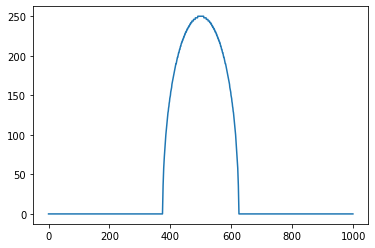

In [310]:
x = np.linspace(-4, 4, 10**3)
y = np.linspace(-4, 4, 10**3)
X, Y = np.meshgrid(x, y)
r = 1.0

I = disc(X, Y, r)
degre = 180.0
theta = np.linspace(0, 180, 1)
R_disc = radon(I, theta = theta, circle = True)
plt.plot(R_disc)
#plt.plot(x, R_disc)
#plt.show()
print(rho(x).shape, R_disc.shape, I.shape)

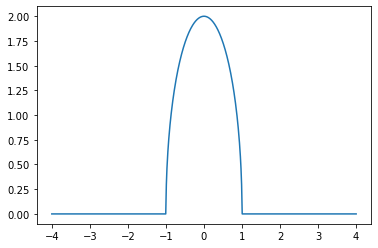

In [191]:
plt.plot(x, rho(x))

# Exercice 3 : Reconstruction

## 1.

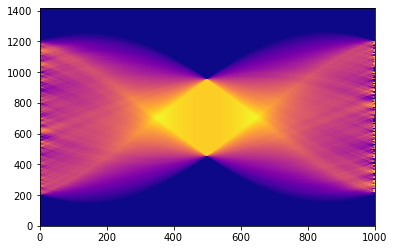

In [321]:
# Transformée de Radon et transformée inverse du code barre 

theta = np.linspace(0., 180., int(1e3), endpoint = False)

Rc = radon(code_barre(int(5e2),int(1e3)), theta = theta, circle = False)

plt.pcolor(Rc, cmap = 'plasma')
plt.show()

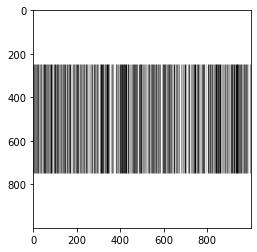

In [323]:
RC = iradon(Rc, theta = theta, circle = False)

plt.imshow(1.0*(RC > 0.5), cmap = 'binary')

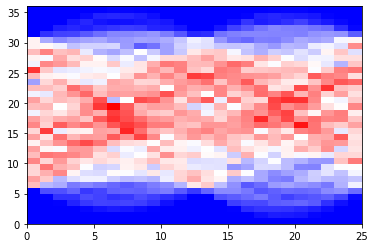

In [324]:
# Transformée de Radon et transformée inverse du QR code
n = 25
theta = np.linspace(0., 180., n, endpoint = False)
Rq = radon(qr_code(n,n), theta = theta, circle = False)

plt.pcolor(Rq, cmap = 'bwr')
plt.show()

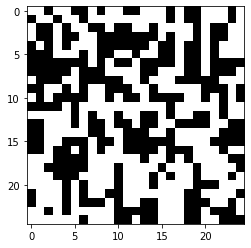

In [326]:
RQ = iradon(Rq, theta = theta, circle = False)
plt.imshow(1.0*(RQ > RQ.mean()), cmap = 'binary')

La transformée inverse de Radon est rapide cependant elle ne reproduit pas fidèlement l'image d'origine notamment avec la présence de bruit.

## 2.

Le paramètre de l'image phantom est la taille de l'image.

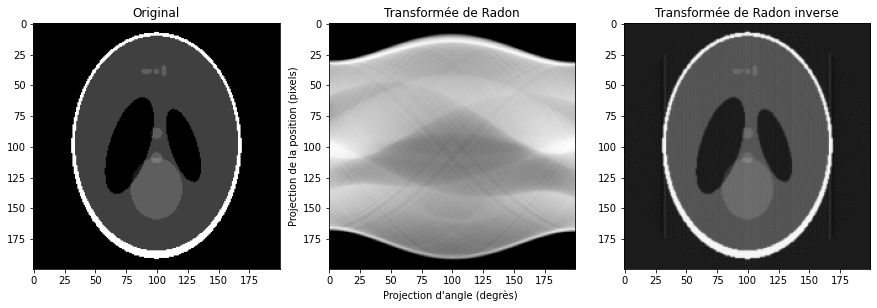

In [327]:
n = 200

P = shepp_logan(n)
theta = np.linspace(0., 180., max(P.shape))
P_radon = radon(P, theta = theta, circle = True)
P_iradon = iradon(P_radon, theta = theta, circle = True)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (15, 5))

ax1.set_title("Original")
ax1.imshow(P, cmap = plt.cm.Greys_r)

ax2.set_title("Transformée de Radon")
ax2.set_xlabel("Projection d'angle (degrès) ")
ax2.set_ylabel("Projection de la position (pixels)")
ax2.imshow(P_radon, cmap = plt.cm.Greys_r)

ax3.set_title("Transformée de Radon inverse")
ax3.imshow(P_iradon, cmap = plt.cm.Greys_r)

plt.show()

Temps d'éxécution (en norme 2) =  29.398496657768447 s


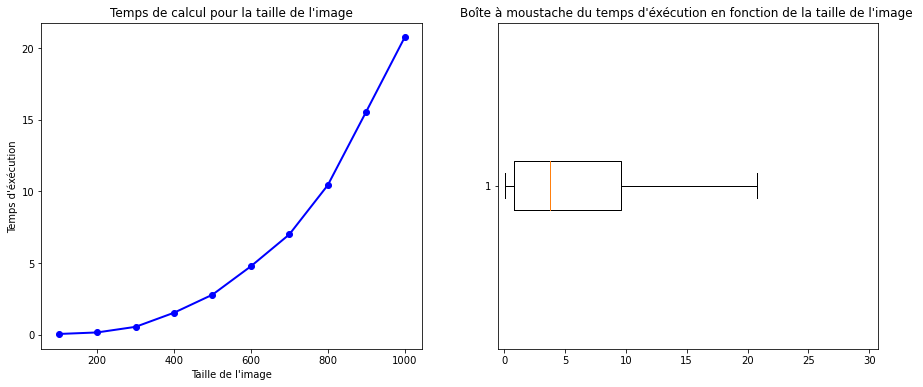

In [331]:
N = 100 #nombre qui permettra d'obtenir la taille de l'image
n = 10 #nombre de fois où l'on étudier le paramètre ici la taille de l'image
t1 = np.zeros(n) #on va stocker les temps afin de pouvoir les récupérer et construire un graphe
t2 = np.zeros(n)

for k in range(0, n):
    P = shepp_logan((k+1)*N)
    theta = np.linspace(0., 180., max(P.shape))
    P_radon = radon(P, theta = theta, circle = True)
    t1[k] = time.perf_counter() #début du chrono
    P_iradon = iradon(P_radon, theta = theta, circle = True)
    t2[k] = time.perf_counter() #fin du chrono
print("Temps d'éxécution (en norme 2) = ", np.linalg.norm(t2-t1, 2), "s")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 6))

ax1.plot(np.linspace(N, n*N, n), t2-t1, 'bo-', linewidth = 2)
ax1.set_title("Temps de calcul pour la taille de l'image")
ax1.set_xlabel("Taille de l'image")
ax1.set_ylabel("Temps d'éxécution")

ax2.boxplot(t2-t1, vert = False)
ax2.set_xlim(-0.5, t2[n-1]-t1[n-1] + n)
ax2.set_ylim(0.5, 1.5)
ax2.set_title("Boîte à moustache du temps d'éxécution en fonction de la taille de l'image ")

plt.show()

Temps d'éxécution (en norme 2) = 2.6313632478097597 s


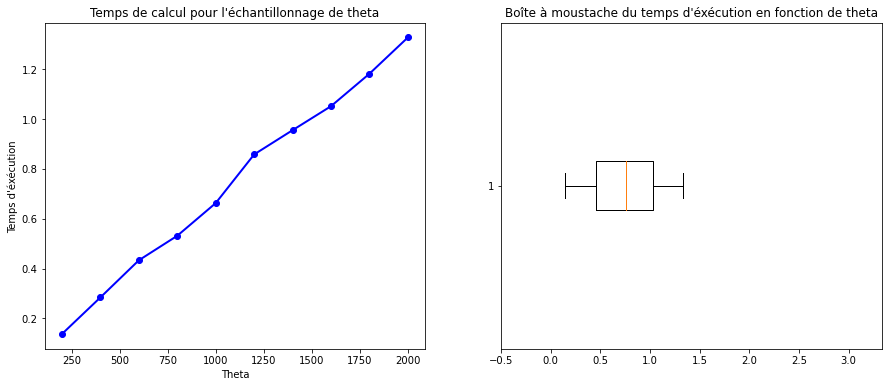

In [332]:
N = 200
n = 10
t1 = np.zeros(n)
t2 = np.zeros(n)

for k in range(0, n):
    P = shepp_logan(N)
    theta = np.linspace(0., 180., (k+1)*max(P.shape))
    P_radon = radon(P, theta = theta, circle = True)
    t1[k] = time.perf_counter() #début du chrono
    P_iradon = iradon(P_radon, theta = theta, circle = True)
    t2[k] = time.perf_counter() #fin du chrono
print("Temps d'éxécution (en norme 2) =", np.linalg.norm(t2-t1, 2), "s")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 6))

ax1.plot(np.linspace(N, n*N, n), t2-t1, 'bo-', linewidth = 2)
ax1.set_title("Temps de calcul pour l'échantillonnage de theta")
ax1.set_xlabel("Theta")
ax1.set_ylabel("Temps d'éxécution")

ax2.boxplot(t2-t1, vert = False)
ax2.set_xlim(-0.5, n/3)
ax2.set_ylim(0.5, 1.5)
ax2.set_title("Boîte à moustache du temps d'éxécution en fonction de theta")

plt.show()

Le temps de calcul augmente avec la taille de l'image et la taille du vecteur theta. La taille d'un de ces deux paramètres améliorent la reconstruction de l'image lorsqu'ils sont suffisamment grands mais cela allonge le temps d'éxécution. Cependant on voit nettement que le paramètre theta influe moins sur le temps d'éxécution que le paramètre de la taille de l'image.

## 3.

Les critères sont la qualité de la reconstruction, le temps d'éxécution, la robustesse de l'algorithme, la complexité en mémoire et la compréhension de l'algorithme vis-à-vis de son utilisateur.